In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy.linalg as la

from sklearn.decomposition import PCA
from pca import pca
from factor_analyzer import FactorAnalyzer

from sklearn.cluster import KMeans

from statsmodels.multivariate.manova import MANOVA

# Carga de datos

In [2]:
data=pd.read_csv("../data/ms_authors.csv",dtype={"age":int,"time":int})
data["citationsProducts"]=data["citations"]/data["products"]
data["pressProducts"]=data["press"]/data["products"]
data["ageProducts"]=data["age"]/data["products"]
data["timeProducts"]=data["time"]/data["products"]
data["productsAge"]=data["products"]/data["age"]
data["productsTime"]=data["products"]/data["time"]
data["std_products"]=(data["products"]-np.mean(data["products"]))/np.std(data["products"])
data["std_citations"]=(data["citations"]-np.mean(data["citations"]))/np.std(data["citations"])
data["std_press"]=(data["press"]-np.mean(data["press"]))/np.std(data["press"])
data

,products,citations,press,age,sex,time,level,category,citationsProducts,pressProducts,ageProducts,timeProducts,productsAge,productsTime,std_products,std_citations,std_press
0,101,94,8,59,M,31,DOCTORADO,TITULAR,0.930693,0.079208,0.584158,0.306931,1.711864,3.258065,1.031687,0.754022,0.133997
1,23,6,2,74,M,49,DOCTORADO,TITULAR,0.260870,0.086957,3.217391,2.130435,0.310811,0.469388,-0.269999,-0.437214,-0.239795
2,35,32,2,49,M,12,DOCTORADO,ASOCIADO,0.914286,0.057143,1.400000,0.342857,0.714286,2.916667,-0.069739,-0.085258,-0.239795
3,5,1,9,55,F,26,DOCTORADO,ASOCIADO,0.200000,1.800000,11.000000,5.200000,0.090909,0.192308,-0.570388,-0.504898,0.196295
4,120,149,2,68,M,26,DOCTORADO,TITULAR,1.241667,0.016667,0.566667,0.216667,1.764706,4.615385,1.348765,1.498544,-0.239795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,10,4,5,55,M,17,MAESTRIA,ASISTENTE,0.400000,0.500000,5.500000,1.700000,0.181818,0.588235,-0.486947,-0.464288,-0.052899
281,49,34,4,62,F,34,MAESTRIA,TITULAR,0.693878,0.081633,1.265306,0.693878,0.790323,1.441176,0.163896,-0.058184,-0.115198
282,3,0,1,46,M,19,DOCTORADO,ASOCIADO,0.000000,0.333333,15.333333,6.333333,0.065217,0.157895,-0.603764,-0.518435,-0.302094
283,17,9,1,52,F,13,DOCTORADO,ASOCIADO,0.529412,0.058824,3.058824,0.764706,0.326923,1.307692,-0.370129,-0.396604,-0.302094


In [117]:
data.to_excel("investigadores_prensa_udea.xlsx")

### Descripción de los datos
Los datos provienen de las dependencias puntaje y recurso humano de la universidad de antioquia. Con ellos realizamos un proceso de búsqueda de la aparición del investigador en medios de comunicación (prensa).
Ignoramos los docentes que no tienen producción científica.

Las variables se describen a continuación:
* products (int): Cantidad de publicaciones
* citations (int): Cantidad de veces que han sido citados todos los productos
* citations/products (float): Cantidad de citas dividido la cantidad de productos
* press (int): cantidad de artículos de prensa en los que ha aparecido el investigador
* age (int): Edad del investigador
* time (int): Años que el investigador ha estado en la universidad
* sex (str): Sexo del investigador
* level (str): Nivel académico
* category (str): Categoría

In [ ]:
data.describe()

,products,citations,press,age,time,citationsProducts,pressProducts,ageProducts,timeProducts,productsAge,productsTime,std_products,std_citations,std_press
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,2.850000e+02,2.850000e+02,2.850000e+02
mean,39.178947,38.298246,5.849123,51.761404,16.410526,0.756697,0.540853,7.306144,2.096338,0.748871,2.913251,3.739699e-17,-1.714029e-17,-1.246566e-17
std,60.027689,74.002799,16.079962,9.083295,9.243378,0.876958,1.907939,12.660636,4.627886,1.163572,5.194093,1.001759e+00,1.001759e+00,1.001759e+00
min,1.000000,0.000000,1.000000,32.000000,2.000000,0.000000,0.002079,0.082789,0.017429,0.013699,0.022727,-6.371410e-01,-5.184346e-01,-3.020935e-01
25%,7.000000,2.000000,1.000000,45.000000,10.000000,0.187500,0.050000,1.097561,0.306931,0.139535,0.640000,-5.370114e-01,-4.913611e-01,-3.020935e-01
50%,20.000000,9.000000,2.000000,51.000000,16.000000,0.500000,0.125000,2.678571,0.720000,0.373333,1.388889,-3.200637e-01,-3.966037e-01,-2.397949e-01
75%,49.000000,45.000000,4.000000,59.000000,21.000000,1.000000,0.363636,7.166667,1.562500,0.911111,3.258065,1.638965e-01,9.072012e-02,-1.151977e-01
max,481.000000,675.000000,199.000000,79.000000,50.000000,5.843750,28.428571,73.000000,44.000000,12.078947,57.375000,7.373234e+00,8.618886e+00,1.203303e+01


# PCA

In [39]:
pca_data=data[["products","citations","press","age","time","citationsProducts"]]

In [40]:
np.std(pca_data)
#calcular coeficiente de variabilidad
#explorar variables relativas con productos principalmente

products             59.922285
citations            73.872855
press                16.051727
age                   9.067346
time                  9.227147
citationsProducts     0.875418
dtype: float64

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


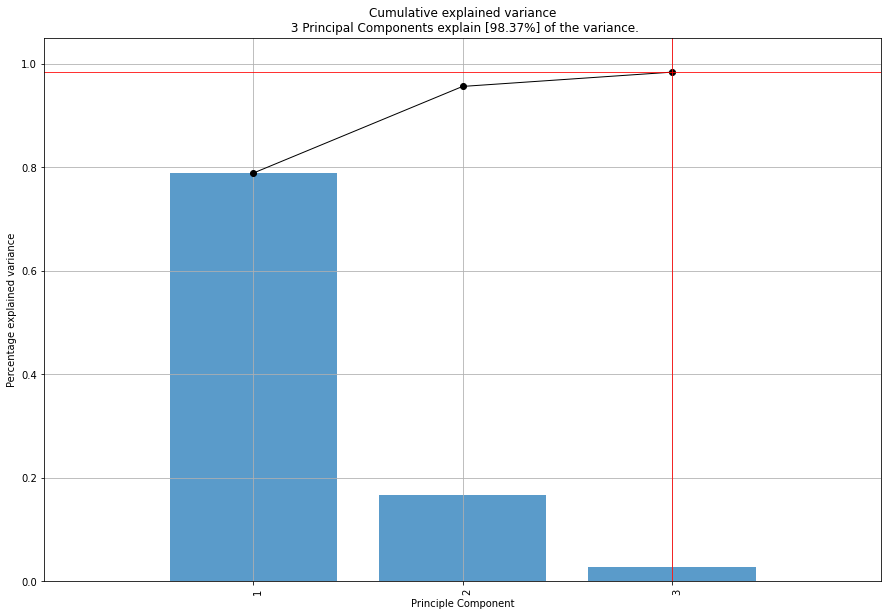

[pca] >Plot PC1 vs PC2 with loadings.


<Figure size 432x288 with 0 Axes>

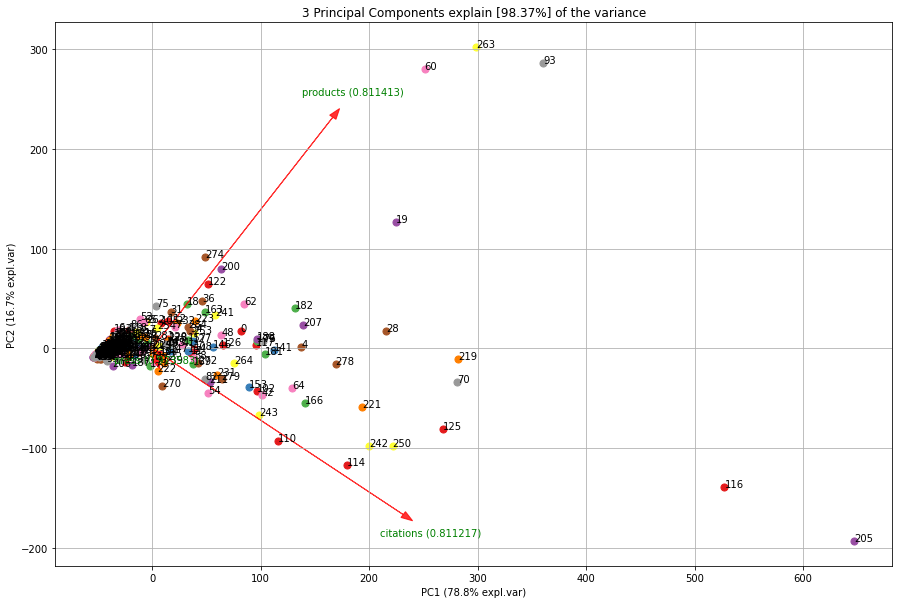

In [41]:
model=pca(n_components=3)
results=model.fit_transform(pca_data)
#fig, ax = model.scatter()
fig, ax = model.plot()
fig, ax = model.biplot(n_feat=3,legend=False)

In [121]:
pca_data=data[["citationsProducts","pressProducts","productsAge","productsTime"]]

In [124]:
np.mean(pca_data)

citationsProducts    0.756697
pressProducts        0.540853
productsAge          0.748871
productsTime         2.913251
dtype: float64

In [123]:
np.std(pca_data)

citationsProducts    0.875418
pressProducts        1.904588
productsAge          1.161529
productsTime         5.184973
dtype: float64

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


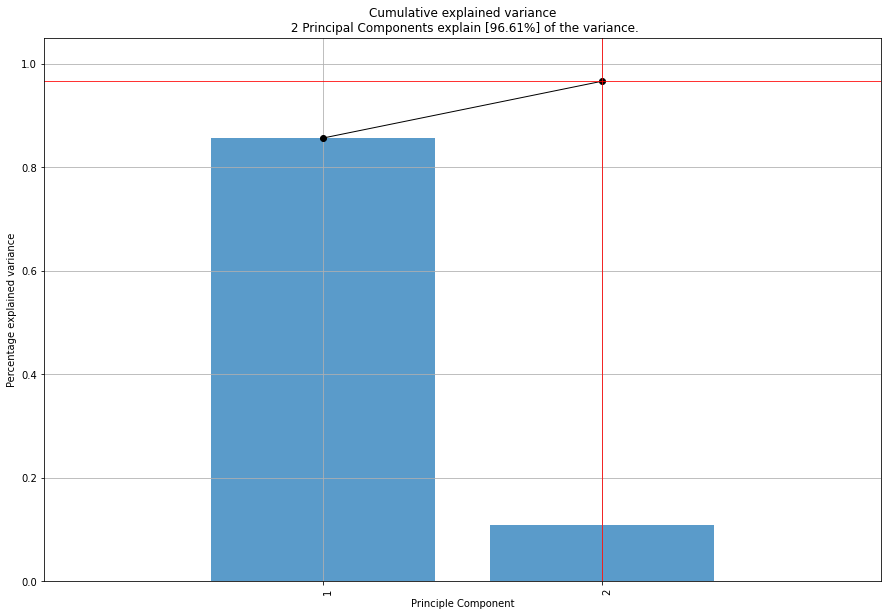

[pca] >Plot PC1 vs PC2 with loadings.


<Figure size 432x288 with 0 Axes>

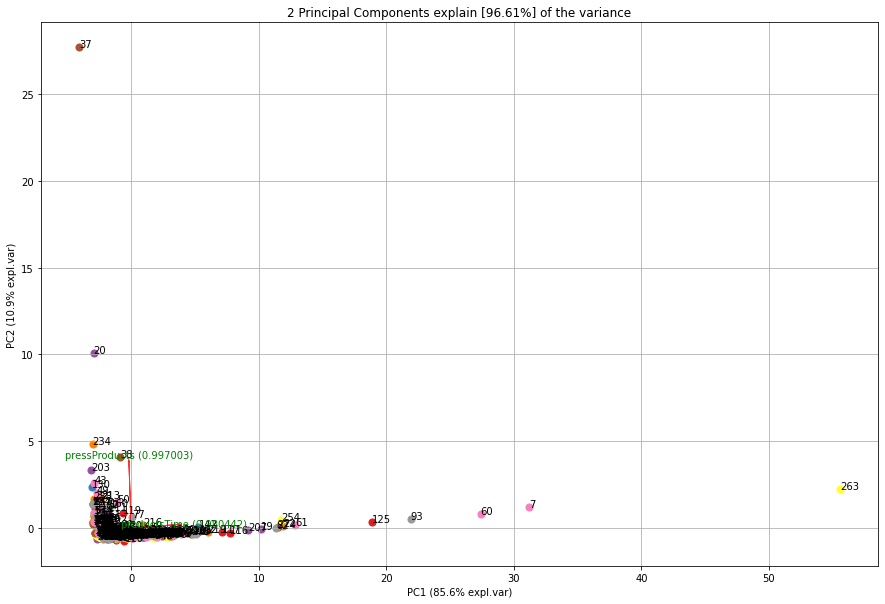

In [174]:
model=pca(n_components=2)
results=model.fit_transform(pca_data)
#fig, ax = model.scatter()
fig, ax = model.plot()
fig, ax = model.biplot(n_feat=2,legend=False)

In [175]:
model.results

{'loadings':      citationsProducts  pressProducts  productsAge  productsTime
 PC1           0.015691      -0.048575     0.190072      0.980442
 PC2          -0.054594       0.997003    -0.014008      0.052984,
 'PC':           PC1       PC2
 0    0.546262 -0.464980
 1   -2.465062 -0.548817
 2    0.022744 -0.490198
 3   -2.862686  1.150816
 4    1.894997 -0.473135
 ..        ...       ...
 280 -2.390937 -0.136503
 281 -1.414085 -0.532992
 282 -2.833204 -0.302001
 283 -1.634510 -0.547335
 284  3.052460 -0.247981
 
 [285 rows x 2 columns],
 'explained_var': array([0.85644471, 0.96617797]),
 'variance_ratio': array([0.85644471, 0.10973325]),
 'model': PCA(n_components=2),
 'scaler': None,
 'pcp': 0.9661779691821218,
 'topfeat':     PC            feature   loading  type
 0  PC1       productsTime  0.980442  best
 1  PC2      pressProducts  0.997003  best
 2  PC2  citationsProducts -0.054594  weak
 3  PC1        productsAge  0.190072  weak,
 'outliers':       y_proba   y_score  y_bool  y_bo

In [176]:
model.alpha

0.05

In [177]:
model.results["PC"]

,PC1,PC2
0,0.546262,-0.464980
1,-2.465062,-0.548817
2,0.022744,-0.490198
3,-2.862686,1.150816
4,1.894997,-0.473135
...,...,...
280,-2.390937,-0.136503
281,-1.414085,-0.532992
282,-2.833204,-0.302001
283,-1.634510,-0.547335


## Factor analisis

In [157]:
factor_data=data[["citationsProducts","pressProducts","productsAge","productsTime"]]
#Se debe hacer con variables normalizadas

In [152]:
fa = FactorAnalyzer()
fa.set_params(n_factors=1, rotation="varimax")
fa.fit(factor_data)

/usr/local/lib/python3.8/dist-packages/factor_analyzer/factor_analyzer.py:656: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn('No rotation will be performed when '


FactorAnalyzer(n_factors=1, rotation='varimax', rotation_kwargs={})

In [153]:
fa.get_eigenvalues()

(array([1.92656842, 1.03235135, 0.89702966, 0.14405057]),
 array([ 1.7568658 ,  0.09138388, -0.00548754, -0.091614  ]))

In [ ]:
#extraer varianza específica o la varianza no explicada por comunalidades

In [146]:
fa.get_communalities()

array([0.01922815, 0.02015551, 0.98756168, 0.72420281])

In [147]:
var=1-np.sum(fa.get_communalities()[:2]**2)
var

0.9992240336217876

In [136]:
fa_varimax = FactorAnalyzer(rotation='varimax')
fa_varimax.fit(factor_data)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [137]:
fa_varimax.get_communalities()

array([0.14197856, 0.11441606, 0.89088664, 0.87249303])

In [138]:
var=1-np.sum(fa.get_communalities()[:2]**2)
var

0.9075389946117891

# Clustering

In [161]:
data_clustering=data[["citationsProducts","pressProducts","productsAge","productsTime"]]

In [162]:
kmeans=KMeans(n_clusters=2,max_iter=1000,tol=1e-6)
kmeans.fit(data_clustering)
kprediction=kmeans.predict(data_clustering)

In [163]:
centroids = kmeans.cluster_centers_
centroids

array([[7.56862932e-01, 5.50209172e-01, 6.49791217e-01, 2.36851752e+00],
       [7.47428100e-01, 1.68897637e-02, 6.29732895e+00, 3.34183333e+01]])

In [164]:
centroids[0,[0,2]],centroids[1,[0,2]]

(array([0.75686293, 0.64979122]), array([0.7474281 , 6.29732895]))

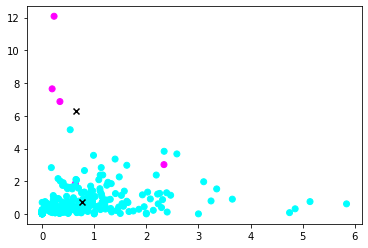

In [166]:
plt.scatter(data["citationsProducts"],data["productsAge"], c = kprediction, cmap = 'cool')
plt.scatter(centroids[0,[0,2]],centroids[1,[0,2]],c="black",marker="x")

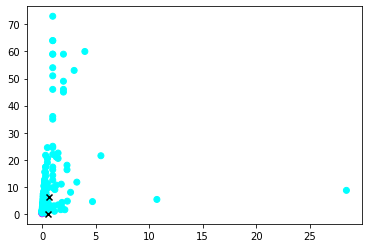

In [169]:
plt.scatter(data["pressProducts"],data["ageProducts"], c = kprediction, cmap = 'cool')
plt.scatter(centroids[0,[1,2]],centroids[1,[1,2]],c="black",marker="x")

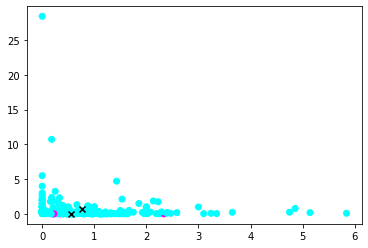

In [171]:
plt.scatter(data["citationsProducts"],data["pressProducts"], c = kprediction, cmap = 'cool')
plt.scatter(centroids[0,[0,1]],centroids[1,[0,1]],c="black",marker="x")

### With results from PCA

In [184]:
data_clustering=model.results["PC"][["PC1","PC2"]]
kmeans=KMeans(n_clusters=3,max_iter=1000,tol=1e-6)
kmeans.fit(data_clustering)
kprediction=kmeans.predict(data_clustering)

In [185]:
centroids= kmeans.cluster_centers_
centroids

array([[ 4.40181432, -0.2864881 ],
       [-1.6044624 ,  0.03876403],
       [30.98838275,  1.01668505]])

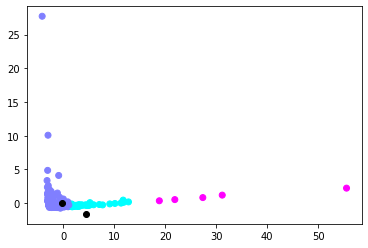

In [186]:
plt.scatter(data_clustering["PC1"],data_clustering["PC2"], c = kprediction, cmap = 'cool')
plt.scatter(centroids[0,:],centroids[1,:],c="black")

# MANOVA

In [6]:
data_manova=data[["category","level","products","press",,"citations"]]

In [8]:
manova = MANOVA.from_formula("products + citations ~ category + level",data=data_manova)
print(manova.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.9554 2.0000 276.0000  6.4353 0.0019
         Pillai's trace 0.0446 2.0000 276.0000  6.4353 0.0019
 Hotelling-Lawley trace 0.0466 2.0000 276.0000  6.4353 0.0019
    Roy's greatest root 0.0466 2.0000 276.0000  6.4353 0.0019
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
        category        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.9216 6.0000 552.0000  3.8351 0.0009
         Pillai's trace 0.0785 6.0000 554.0000  3.7710 0.0011
 Hotelling-Lawley trace 0.

In [68]:
data_manova = model.results["PC"][["PC1","PC2"]]
data_manova=data_manova.join(data["category"])
data_manova.columns

Index(['PC1', 'PC2', 'category'], dtype='object')

In [69]:
manova = MANOVA.from_formula("PC1 + PC2 ~ category",data=data_manova)
print(manova.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.9434 2.0000 280.0000  8.4023 0.0003
         Pillai's trace 0.0566 2.0000 280.0000  8.4023 0.0003
 Hotelling-Lawley trace 0.0600 2.0000 280.0000  8.4023 0.0003
    Roy's greatest root 0.0600 2.0000 280.0000  8.4023 0.0003
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
        category        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.8343 6.0000 560.0000  8.8460 0.0000
         Pillai's trace 0.1664 6.0000 562.0000  8.5031 0.0000
 Hotelling-Lawley trace 0.